# Milestone 4: Whisper Transcriber & Translator - Deployment and Testing with Visualizations

Student Name: Nirekha Chitturi  
Student ID: A00027695  
Colab Link: https://colab.research.google.com/drive/1VwypP_ov57cRs0hQ2tqM512A4ZqUBKuL#scrollTo=yPQ_USQSPd9v

## Objective
This project creates a Speech-To-Text application using OpenAI's Whisper ASR system. It transcribes audio, translates it into French, detects the language, and provides downloadable results. For Milestone 4, we:
- Test utility functions with unit tests
- Deploy the app using Gradio in Colab
- Visualize the audio waveform
- Document the process for PDF export

## Whisper Overview
Whisper, developed by OpenAI, is trained on 680,000 hours of multilingual speech data. It uses an encoder-decoder Transformer architecture, processing 30-second audio chunks into log-Mel spectrograms for transcription and translation. Learn more at [OpenAI Whisper Blog](https://openai.com/blog/whisper/).

## Install Required Libraries
Install the necessary Python packages, including Whisper, Gradio, and visualization tools like Matplotlib.

In [1]:
!pip install -q torch git+https://github.com/openai/whisper.git langdetect ffmpeg-python gradio matplotlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

## Define Utility Functions
These functions handle language detection and output file saving.

In [2]:
from langdetect import detect
import os

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

def save_output_file(transcription, translation, whisper_lang, detected_lang):
    content = (
        '=== TRANSCRIPTION ===\n' + transcription + '\n\n'
        '=== TRANSLATION (FR) ===\n' + translation + '\n\n'
        '=== LANGUAGE DETECTION ===\n'
        f'Whisper: {whisper_lang}\nLangdetect: {detected_lang}\n'
    )
    file_path = 'whisper_output.txt'
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(content)
    return file_path

## Unit Tests for Utility Functions
Test `detect_language()` and `save_output_file()` to ensure reliability.

In [3]:
import unittest

class TestUtils(unittest.TestCase):
    def test_detect_language(self):
        self.assertEqual(detect_language('Hello, how are you?'), 'en')
        self.assertEqual(detect_language('Bonjour, comment vas-tu?'), 'fr')
        self.assertEqual(detect_language(''), 'unknown')

    def test_save_output_file(self):
        transcription = 'This is a test.'
        translation = 'Ceci est un test.'
        whisper_lang = 'en'
        detected_lang = 'en'
        file_path = save_output_file(transcription, translation, whisper_lang, detected_lang)
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        self.assertIn('=== TRANSCRIPTION ===', content)
        self.assertIn(transcription, content)
        self.assertIn('=== TRANSLATION (FR) ===', content)
        self.assertIn(translation, content)
        self.assertIn('=== LANGUAGE DETECTION ===', content)
        self.assertIn(f'Whisper: {whisper_lang}', content)
        self.assertIn(f'Langdetect: {detected_lang}', content)
        os.remove(file_path)  # Cleanup

# Run tests
if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_detect_language (__main__.TestUtils.test_detect_language) ... ok
test_save_output_file (__main__.TestUtils.test_save_output_file) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.775s

OK


## Visualize Audio Waveform
Upload an audio file and plot its waveform to visualize the signal before processing.

Saving harvard.wav to harvard.wav


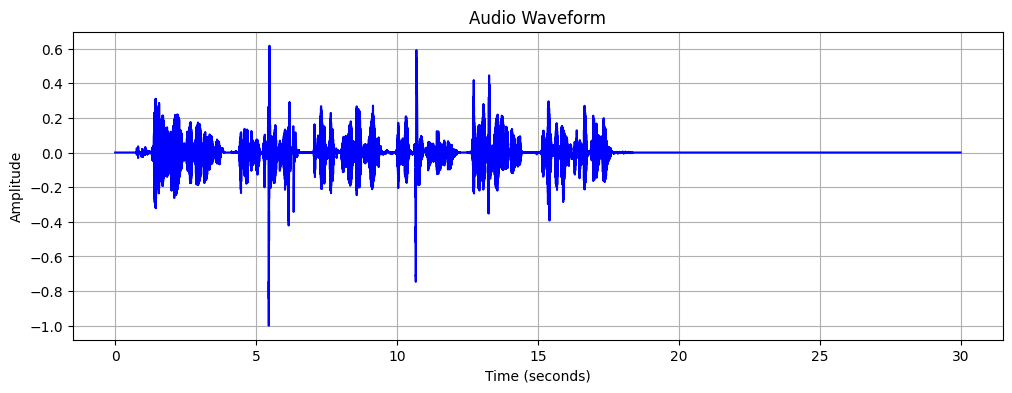

In [4]:
import whisper
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload audio file
uploaded = files.upload()
audio_path = list(uploaded.keys())[0]

# Load and preprocess audio
audio = whisper.load_audio(audio_path)
audio = whisper.pad_or_trim(audio)

# Calculate time axis
sample_rate = 16000  # Whisper default sample rate
time = np.linspace(0, len(audio) / sample_rate, num=len(audio))

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(time, audio, color='blue')
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Define Transcription and Translation Logic
Load the Whisper model and define the core transcription/translation function, including waveform visualization in the Gradio app.

In [5]:
import whisper
import gradio as gr

model = whisper.load_model('medium')

def transcribe_and_translate(audio_path):
    # Load and preprocess audio
    audio = whisper.load_audio(audio_path)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # Calculate time axis for visualization
    sample_rate = 16000
    time = np.linspace(0, len(audio) / sample_rate, num=len(audio))

    # Create waveform plot
    plt.figure(figsize=(12, 4))
    plt.plot(time, audio, color='blue')
    plt.title('Audio Waveform')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.savefig('waveform.png')
    plt.close()

    # Language detection
    whisper_probs = model.detect_language(mel)[1]
    top_lang = max(whisper_probs, key=whisper_probs.get)

    # Transcription
    result = model.transcribe(audio_path, fp16=False)
    transcription = result['text']

    # Fallback language detection
    fallback_lang = detect_language(transcription)

    # Translation to French
    translation = model.transcribe(audio_path, language='fr', fp16=False)['text']

    # Save output
    file_path = save_output_file(transcription, translation, top_lang, fallback_lang)

    return (
        f'Whisper: {top_lang} | langdetect: {fallback_lang}',
        transcription,
        translation,
        file_path,
        'waveform.png'
    )

100%|█████████████████████████████████████| 1.42G/1.42G [00:29<00:00, 51.3MiB/s]


## Deploy the Application with Gradio
Create a Gradio interface with an additional output for the waveform plot.

In [6]:
app = gr.Interface(
    fn=transcribe_and_translate,
    inputs=gr.Audio(type='filepath', label='🎧 Upload Audio File'),
    outputs=[
        gr.Text(label='🌐 Language Detection'),
        gr.Textbox(label='📝 Transcription'),
        gr.Textbox(label='🇫🇷 Translation (French)'),
        gr.File(label='📄 Download Result (.txt)'),
        gr.Image(label='📈 Audio Waveform')
    ],
    title='🗣️ Whisper Transcriber & Translator with Visualization',
    description='Upload audio to get transcription, French translation, language detection, and a waveform plot.'
)

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ad9b78c5477091db7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Conclusion
We successfully:
- Tested utility functions with `unittest` to ensure correctness.
- Visualized the audio waveform for better insight into the input signal.
- Deployed a Whisper-based Speech-To-Text app with Gradio, including a waveform plot, accessible via a public URL.


